# Analysis of `Store`

A `Weekly_Sales` of each store is quite related to **their average or median** of `Weekly_Sales` and its **trends**.  

In this time, Let's check `Weekly_Sales` trends of each store.
And then, We can choose an appropriate ML model for each store.

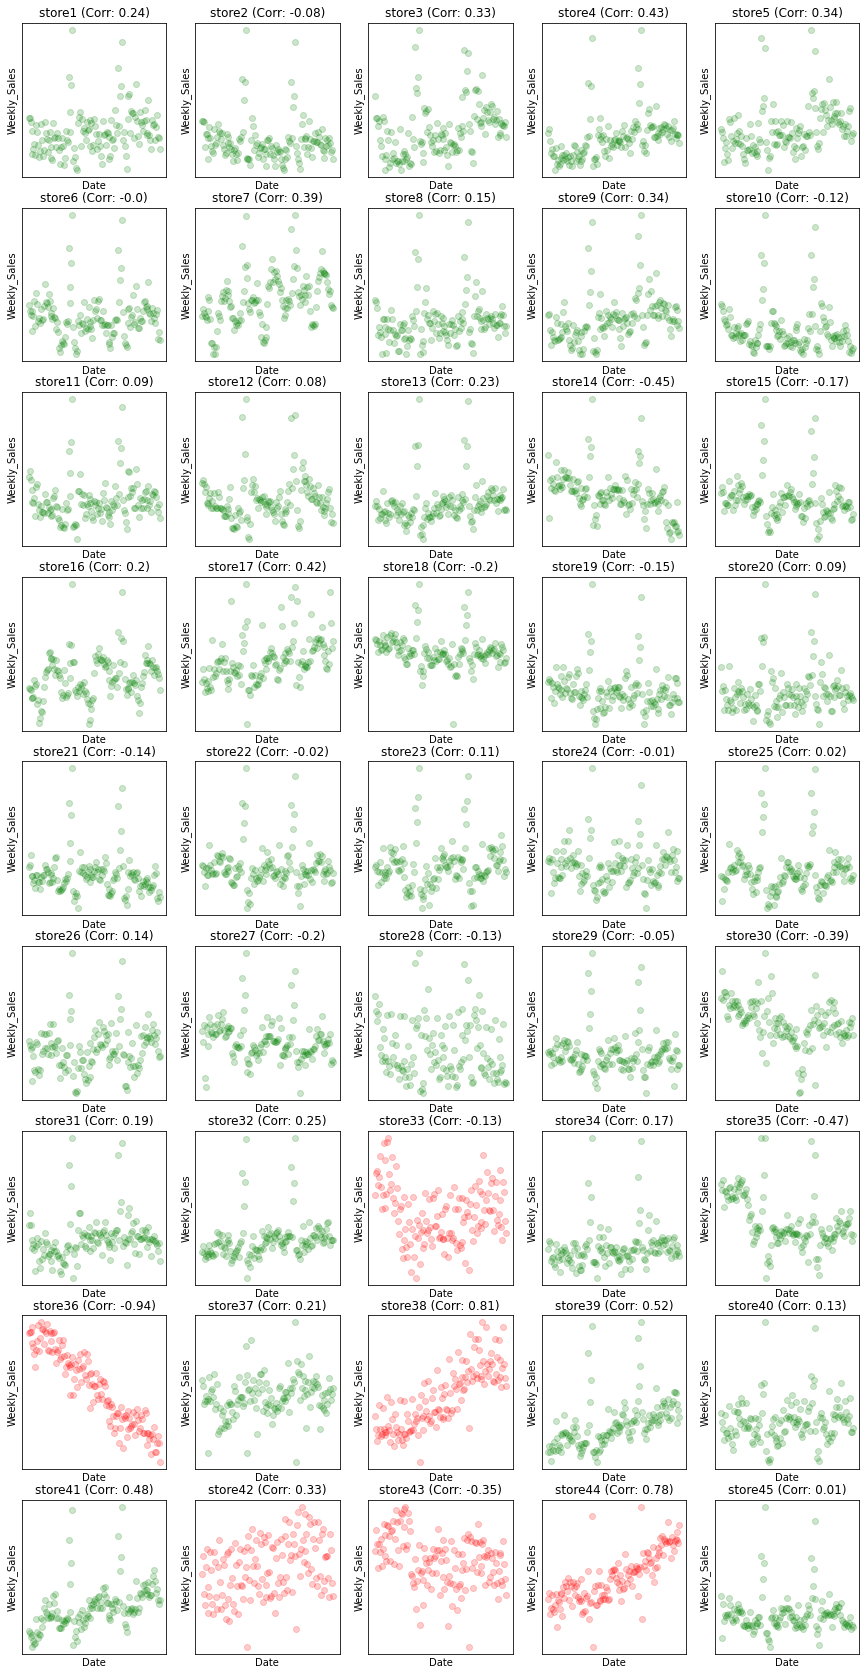

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np


def date_to_week(date):
    day, month, year = map(int, date.split('/'))
    t = dt.datetime(year, month, day) - dt.datetime(2010, 2, 5)
    return int(t.days // 7)

def date_split(date):
    return tuple(map(int, date.split('/')))



train = pd.read_csv("../dataset/train.csv")

train["Day"] = train["Date"].apply(lambda x: date_split(x)[0])
train["Month"] = train["Date"].apply(lambda x: date_split(x)[1])
train["Year"] = train["Date"].apply(lambda x: date_split(x)[2])

train["Week"] = train["Date"].apply(date_to_week)
train["Weekly_Sales"] = np.log1p(train["Weekly_Sales"])
train = train.drop(columns=['id'])



diff = [33, 36, 38, 42, 43, 44]

plt.figure(figsize=(15, 30))
for store in range(1, 46):
    store_df = train[train["Store"] == store]
    correlation = store_df.corr()["Week"].loc["Weekly_Sales"].round(2)
    
    # Set canvas of each plot
    ax = plt.subplot(9, 5, store)
    plt.title(f"store{store} (Corr: {correlation})") 
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
    plt.xlabel("Date")
    plt.ylabel("Weekly_Sales")
    
    # Set color
    color = "green"
    if store in diff:
        color = "red"
    
    # Draw each plot
    plt.scatter(store_df["Week"], y=store_df["Weekly_Sales"], c=color, alpha=0.2)

### Result
We can group stores by identifying a trend of their scatter graph.  
Store number, **33, 36, 38, 42, 43, 44** has a different trend.

In [8]:
def stores_heatmap(stores):
    for i, v in enumerate(stores, 1):
        t = train[train['Store'] == v].drop(columns=['Store'])
        c = t.corr()
        plt.subplot(len(stores), 1, i)
        sns.heatmap(c, annot=True)

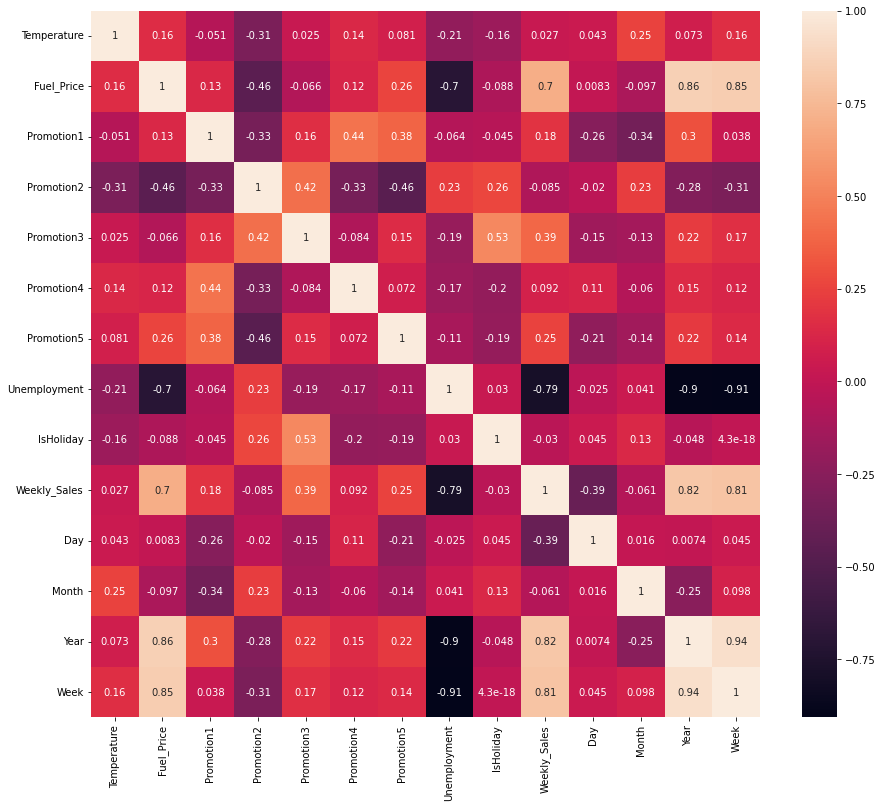

In [16]:
stores_heatmap([38])